**21.03.2025**


1. Load dataset

In [12]:
import pandas as pd
df = pd.read_csv('food.csv')

2. Analyze dataset

In [13]:
print("Dataset Dimensions:", df.shape)
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nFeature Statistics:\n", df.describe())

Dataset Dimensions: (25, 10)

Missing Values per Column:
 Unnamed: 0    0
RedMeat       0
WhiteMeat     0
Eggs          0
Milk          0
Fish          0
Cereals       0
Starch        0
Nuts          0
Fr.Veg        0
dtype: int64

Feature Statistics:
          RedMeat  WhiteMeat       Eggs       Milk       Fish    Cereals  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    9.828000   7.896000   2.936000  17.112000   4.284000  32.248000   
std     3.347078   3.694081   1.117617   7.105416   3.402533  10.974786   
min     4.400000   1.400000   0.500000   4.900000   0.200000  18.600000   
25%     7.800000   4.900000   2.700000  11.100000   2.100000  24.300000   
50%     9.500000   7.800000   2.900000  17.600000   3.400000  28.000000   
75%    10.600000  10.800000   3.700000  23.300000   5.800000  40.100000   
max    18.000000  14.000000   4.700000  33.700000  14.200000  56.700000   

          Starch       Nuts     Fr.Veg  
count  25.000000  25.000000  2

3. Preprocess data - alles was leer ist löschen 

In [14]:

df_clean = df.dropna()

4. Perform PCA

In [15]:
from sklearn.preprocessing import StandardScaler
numeric_df = df_clean.select_dtypes(include=['number'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

5. Create score plot

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# plot 
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='pink', alpha=0.7, edgecolors='w')
plt.title('PCA Score Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

**Aufgabe 2.1**

1. Load dataset 

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('diabetes.csv',)
print("Initial Dataset Shape:", df.shape)

Initial Dataset Shape: (768, 9)


**2. Define and apply IQR-based outlier detection**

In [ ]:
# alle Zeilen selektieren vom Typ number also nur die numerischen Werte

numeric_cols = df.select_dtypes(include=['number']).columns
#die detection
Q1 = df[numeric_cols].quantile(0.25) # 25% Quantil
Q3 = df[numeric_cols].quantile(0.75) # 75% Quantil
IQR = Q3 - Q1 # Interquartilbereich

#defineren der Außreißer -> Werte die außerhalb des Interquartilbereichs liegen

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

#definerten Außenseiter mit NA ersetzen
outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))
df[numeric_cols] = df[numeric_cols].mask(outliers)
# true wenn ein Wert ein Außenseiter ist - False wenn er im Interquartilbereich liegt

print("\nRandwerte die mit Na ergänz werden.\nAnzahl fehlender Werte:")
print(df.isnull().sum())

# leere Zeilen löschen 
df_clean = df.dropna()
print("\nDaten ohne Außreißer (after removing outliers):", df_clean.shape)



Randwerte die mit Na ergänz werden.
Anzahl fehlender Werte:
preg       4
plas       5
pres      49
skin     230
insu     421
mass      19
pedi      44
age       16
class      0
dtype: int64

Daten ohne Außreißer (after removing outliers): (309, 9)


Wichtig: die Außreißer können Modelle verzerren - mann sollte aber die 0 in manchen Variablen prüfen

Da es keine Tabellenbeschreibung gibt kann ich nur raten wofür die Einzlen Variabelen stehen. Ich würde sagen das außer bei preg (Anzah der SW ?) die 0 Werte entfernt werden sollten weil sie sehr warhscheinlich auf fehlende Werte / Messungen hindeuten

**3. Describe single features**

In [ ]:
print("\nSummary Statistics (After Cleaning):\n")
print(df_clean.describe())


Summary Statistics (After Cleaning):

             preg        plas        pres        skin        insu        mass  \
count  611.000000  611.000000  611.000000  611.000000  611.000000  611.000000   
mean     3.736498  118.024550   71.851064   20.653028   63.626841   31.938625   
std      3.225558   28.598883   11.008004   15.303297   76.072559    6.432949   
min      0.000000   44.000000   44.000000    0.000000    0.000000   18.200000   
25%      1.000000   98.500000   64.000000    0.000000    0.000000   27.300000   
50%      3.000000  113.000000   72.000000   23.000000   37.000000   32.000000   
75%      6.000000  134.500000   80.000000   32.000000  115.000000   35.900000   
max     13.000000  198.000000  104.000000   60.000000  285.000000   50.000000   

             pedi         age  
count  611.000000  611.000000  
mean     0.416591   32.168576  
std      0.231772   10.582203  
min      0.078000   21.000000  
25%      0.238000   24.000000  
50%      0.355000   28.000000  
75%    

**4. Chi-squared statistics**

In [ ]:
print(df_clean.columns)
#zur Hilfe um die Outputvariable zu finden

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')


In [ ]:
# Definieren Merkmale und Zielvariable X ist dann zum "Füttern" des Modells und y ist das Ziel, das vorhergesagt werden soll
X = df_clean.drop('class', axis=1)
y = df_clean['class']

# Min und Max Skalierung
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chi2 test
chi2_scores, p_values = chi2(X_scaled, y)

# raning der Features erstellen, die auf den Chi2-Scores basieren
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi2_scores,
    'P_Value': p_values
}).sort_values(by='Chi2_Score', ascending=False)

print("\nChi-squared Feature Ranking:\n", feature_ranking)


Chi-squared Feature Ranking:
   Feature  Chi2_Score   P_Value
1    plas   10.720878  0.001059
7     age   10.472197  0.001212
0    preg    6.176099  0.012949
5    mass    4.393171  0.036083
6    pedi    2.366941  0.123930
4    insu    1.823586  0.176887
2    pres    1.459347  0.227034
3    skin    0.095191  0.757678


 Rank features using: plas (Blutzucherwert) und age sind beide sehr signifikatn 
 skin hat ein sehr geringen Chi2-Wert und einen hohne p-Wert (>0,5) und ist damit am wenigsten signifikant

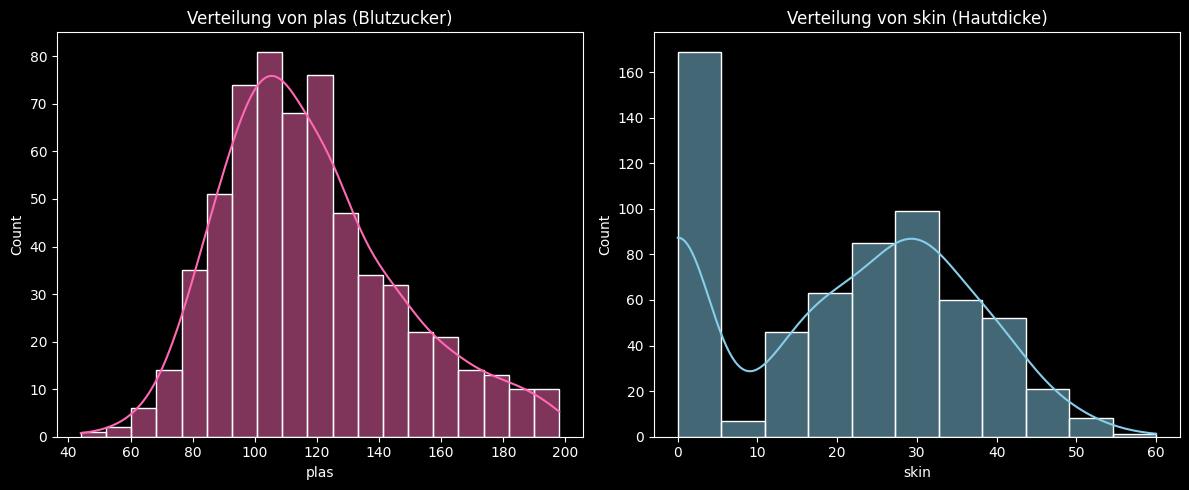

In [ ]:
plt.figure(figsize=(12, 5))

# Histogramm für plas
plt.subplot(1, 2, 1)
sns.histplot(df_clean['plas'], kde=True, color='hotpink')
plt.title('Verteilung von plas (Blutzucker)')

# Histogramm für skin
plt.subplot(1, 2, 2)
sns.histplot(df_clean['skin'], kde=True, color='skyblue')
plt.title('Verteilung von skin (Hautdicke)')

plt.tight_layout()
plt.show()

plas (Blutzucker):
Gut geeignet für Modelle (fast normalverteilt) evt Außenseitung betrachten

skin (Hautdicke):
Verteilung problematisch wegen hoher Spitze und Ausreißern
Eventuell Datenbereinigung oder Transformation nötig

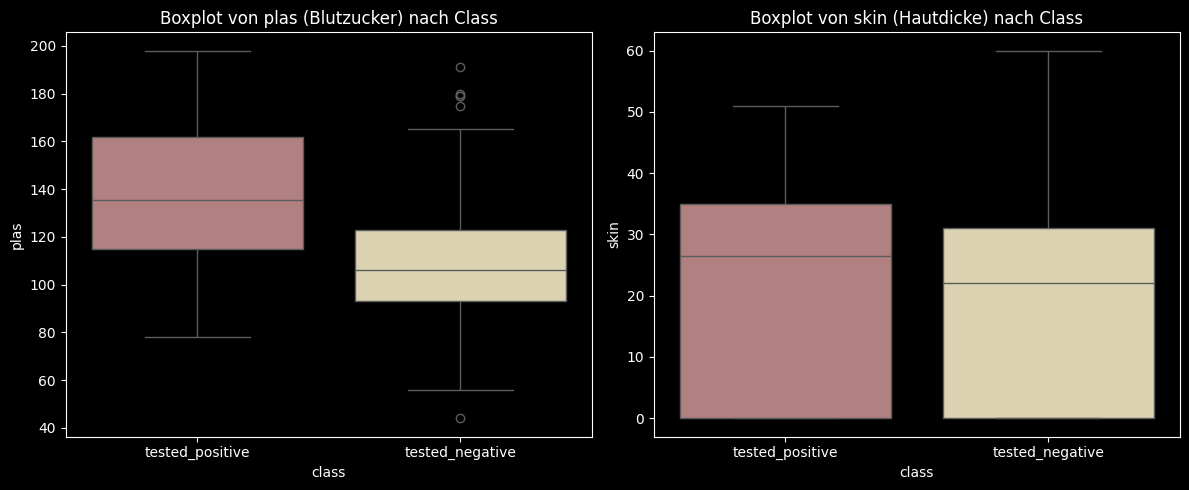

In [ ]:
# aus meine Liste die besten und schlechtesten Merkmale
best_feature = feature_ranking.iloc[0]['Feature']
worst_feature = feature_ranking.iloc[-1]['Feature']

plt.figure(figsize=(12, 5))

# Boxplot für plas
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y=best_feature, data=df_clean, hue='class', palette='pink', dodge=False)
plt.title(f'Boxplot von {best_feature} (Blutzucker) nach Class')

# Boxplot für das skin
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y=worst_feature, data=df_clean, hue='class', palette='pink', dodge=False)
plt.title(f'Boxplot von {worst_feature} (Hautdicke) nach Class')

plt.tight_layout()
plt.show()



**Jetzt versuche ich die 0-Werte zu entfernen und schaue was es an meinem Ergbniss ändert**

In [ ]:
print(df[numeric_cols].isin([0]).sum())

preg    111
plas      0
pres      0
skin    227
insu    374
mass      0
pedi      0
age       0
dtype: int64


nur bei skin und insu müssen die 0-Werte entfernt werden

In [ ]:

cols_to_replace_zeros = ['skin', 'insu']
df[cols_to_replace_zeros] = df[cols_to_replace_zeros].replace(0, np.nan)

print("Anzahl fehlender Werte nach dem Ersetzen von 0:")
print(df.isnull().sum())


Anzahl fehlender Werte nach dem Ersetzen von 0:
preg       4
plas       5
pres      49
skin     228
insu     421
mass      19
pedi      44
age       16
class      0
dtype: int64


um hier weiter zu machen fehlt mir leider die Zeit 